
# ARIMA and Seasonal ARIMA


## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions

Let's go through these steps!

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (15,5)
plt.style.use('seaborn-darkgrid')

In [2]:
data = '/Users/rahul/GitHub/ARIMA-And-Seasonal-ARIMA-master/perrin-freres-monthly-champagne-.csv'

In [3]:
df = pd.read_csv(data)

In [4]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [6]:
df.shape

(107, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 2 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Month                                                   106 non-null    object 
 1   Perrin Freres monthly champagne sales millions ?64-?72  105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


In [8]:
df.isnull().sum()

Month                                                     1
Perrin Freres monthly champagne sales millions ?64-?72    2
dtype: int64

In [11]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [15]:
# remove nan values
df.dropna(inplace=True)

In [16]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [17]:
# change 2nd column name of the dataset

df.rename(columns={'Perrin Freres monthly champagne sales millions ?64-?72' : 'Sales'}, inplace=True)

In [18]:
df

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0


In [19]:
# Convert Month into Datetime
df['Month'] = pd.to_datetime(df['Month'])

In [20]:
df

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0
...,...,...
100,1972-05-01,4618.0
101,1972-06-01,5312.0
102,1972-07-01,4298.0
103,1972-08-01,1413.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   105 non-null    datetime64[ns]
 1   Sales   105 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.5 KB


#### now we can see that it converted into datetime 

In [22]:
# now we need to set Month column as index

df = df.set_index('Month')

In [23]:
df

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


In [24]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


# step 2 : Visualize Data

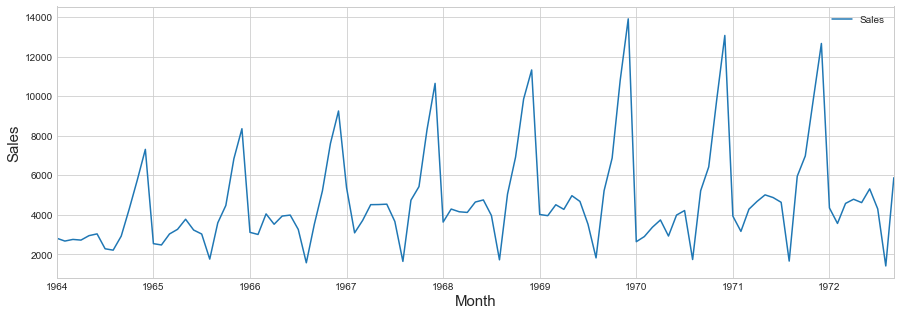

In [43]:
df.plot()
plt.xlabel('Month', size=15)
plt.ylabel('Sales', size=15)
plt.show()

In [34]:
import plotly.express as px

In [41]:
fig = px.line(df)
fig.show()

In [45]:
# checking if the data is stationary

# H0 : Data is not stationary
# H1 : Data is Stationary

from statsmodels.tsa.stattools import adfuller

In [46]:
test_result = adfuller(df['Sales'])

In [47]:
test_result

(-1.8335930563276237,
 0.3639157716602447,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [64]:
# we need to assign names to those numbers so to do that we have to

def adfullter_test(sales):
    
    # plotting data
    fig = px.line(sales)
    fig.show()
    
    # Adfuller test
    result = adfuller(sales)
    labels = pd.Series(result[0:4], index=['ADF Test Statistic', 'P-Value', 'NO of Lags', 'Number of Observations Used'])
    for key, value in result[4].items():
        labels['Critical value (%s)' %key] = value
    
    print(labels)
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [53]:
adfullter_test(df.Sales)

ADF Test Statistic             -1.833593
P-Value                         0.363916
NO of Lags                     11.000000
Number of Observations Used    93.000000
Critical value (1%)            -3.502705
Critical value (5%)            -2.893158
Critical value (10%)           -2.583637
dtype: float64
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [54]:
# WE CAN USE DIFFERENCING TO MAKE IT STATIONARY

# Differencing

In [94]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [95]:
df

,Sales,Sales First Difference,forecast
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
...,...,...,...
1972-05-01,4618.0,-170.0,4717.511361
1972-06-01,5312.0,694.0,4906.404252
1972-07-01,4298.0,-1014.0,4685.436904


In [96]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [97]:
# due to the data is seasonal we have to shift it to 12 

df['Seasonal First Difference'] = df['Sales'] - df['Sales'].shift(12)

In [98]:
df[:20]

,Sales,Sales First Difference,forecast,Seasonal First Difference
Month,,,,
1964-01-01,2815.0,NaN,NaN,NaN
1964-02-01,2672.0,-143.0,NaN,NaN
1964-03-01,2755.0,83.0,NaN,NaN
1964-04-01,2721.0,-34.0,NaN,NaN
1964-05-01,2946.0,225.0,NaN,NaN
1964-06-01,3036.0,90.0,NaN,NaN
1964-07-01,2282.0,-754.0,NaN,NaN
1964-08-01,2212.0,-70.0,NaN,NaN
1964-09-01,2922.0,710.0,NaN,NaN


In [100]:
adfullter_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic            -7.626619e+00
P-Value                        2.060580e-11
NO of Lags                     0.000000e+00
Number of Observations Used    9.200000e+01
Critical value (1%)           -3.503515e+00
Critical value (5%)           -2.893508e+00
Critical value (10%)          -2.583824e+00
dtype: float64
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## Auto Regressive Model

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    - p,d,q
    - p AR model lags
    - d differencing
    - q MA lags

In [68]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

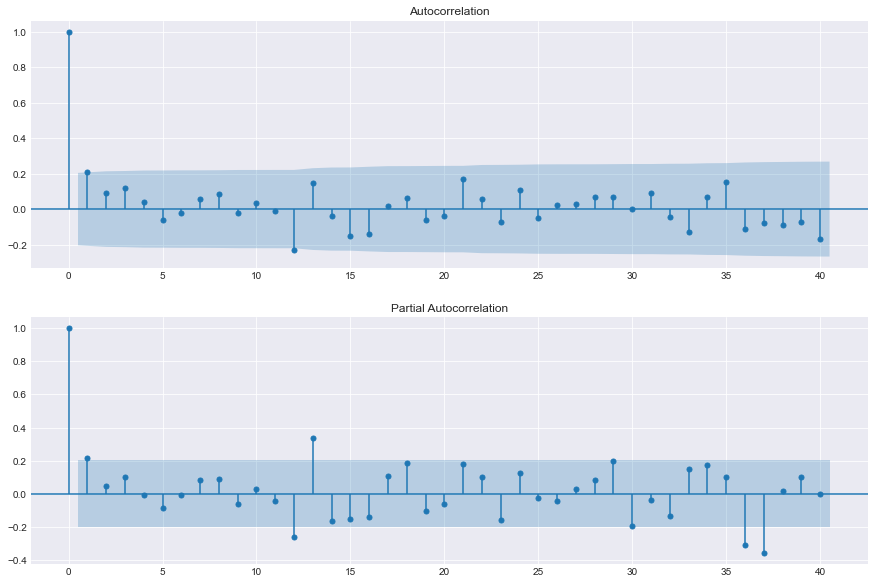

In [101]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,1,1) # 2rows, 1column, 1st plot
fig = plot_acf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(2,1,2)
fig = plot_pacf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax2)

In [79]:
# For non-seasonal data
#p=1, d=1, q=0 or 1

In [80]:
from statsmodels.tsa.arima_model import ARIMA

In [81]:
model = ARIMA(df['Sales'], order=(1,1,1))
model_fit = model.fit()

/Users/rahul/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/Users/rahul/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/rahul/op

In [82]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Thu, 06 Jan 2022   AIC                           1910.251
Time:                        17:30:04   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7831     12.405      1.837      0.066      -1.531      47.097
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Month'>

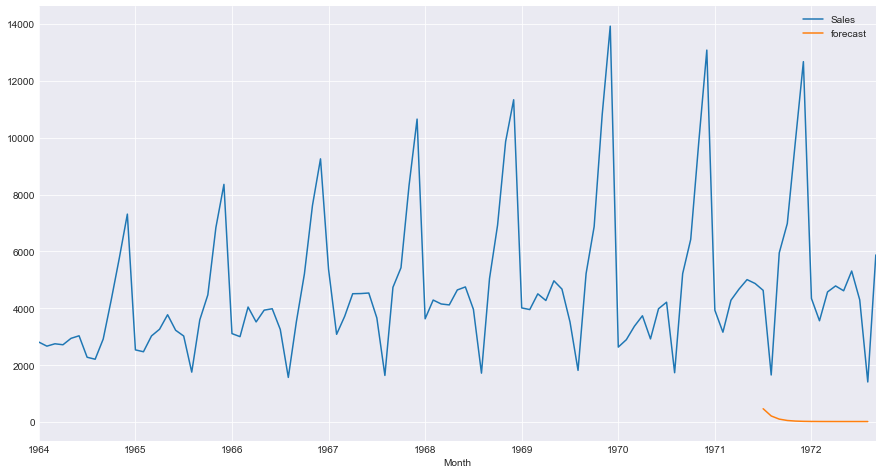

In [83]:
df['forecast'] = model_fit.predict(start=90, end=103, dynamic=True)
df[['Sales', 'forecast']].plot(figsize = (15,8))

### since it is seasonal data we cannot predict it accurately we have to use SARIMA to do get required outcome

In [84]:
import statsmodels.api as sm

In [107]:
model = sm.tsa.statespace.SARIMAX(df['Sales'], order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit()

/Users/rahul/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



<AxesSubplot:xlabel='Month'>

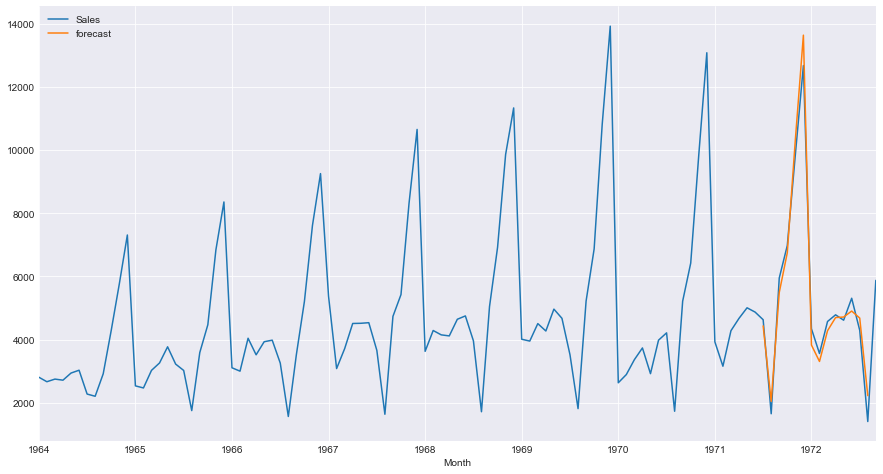

In [109]:
df['forecast'] = results.predict(start=90, end=103, dynamic=True)
df[['Sales', 'forecast']].plot(figsize=(15,8))

In [92]:
# Predicting future data

from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,24)]
future_dates

[Timestamp('1972-09-01 00:00:00'),
 Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00')]

In [102]:
df

,Sales,Sales First Difference,forecast,Seasonal First Difference
Month,,,,
1964-01-01,2815.0,NaN,NaN,NaN
1964-02-01,2672.0,-143.0,NaN,NaN
1964-03-01,2755.0,83.0,NaN,NaN
1964-04-01,2721.0,-34.0,NaN,NaN
1964-05-01,2946.0,225.0,NaN,NaN
...,...,...,...,...
1972-05-01,4618.0,-170.0,4717.511361,-392.0
1972-06-01,5312.0,694.0,4906.404252,438.0
1972-07-01,4298.0,-1014.0,4685.436904,-335.0


In [103]:
future_dates_df = pd.DataFrame(index=future_dates[1:], columns=df.columns)

In [104]:
future_dates_df

,Sales,Sales First Difference,forecast,Seasonal First Difference
1972-10-01,NaN,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN,NaN
1973-01-01,NaN,NaN,NaN,NaN
1973-02-01,NaN,NaN,NaN,NaN
1973-03-01,NaN,NaN,NaN,NaN
1973-04-01,NaN,NaN,NaN,NaN
1973-05-01,NaN,NaN,NaN,NaN
1973-06-01,NaN,NaN,NaN,NaN
1973-07-01,NaN,NaN,NaN,NaN


In [105]:
# let's concate df and future_dates_df

future_df = pd.concat([df, future_dates_df])

In [106]:
future_df

,Sales,Sales First Difference,forecast,Seasonal First Difference
1964-01-01,2815.0,NaN,NaN,NaN
1964-02-01,2672.0,-143.0,NaN,NaN
1964-03-01,2755.0,83.0,NaN,NaN
1964-04-01,2721.0,-34.0,NaN,NaN
1964-05-01,2946.0,225.0,NaN,NaN
...,...,...,...,...
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN


<AxesSubplot:>

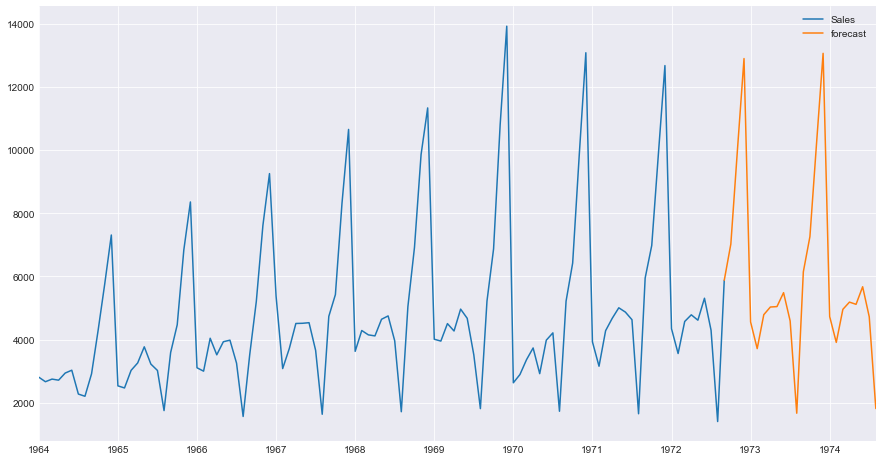

In [111]:
future_df['forecast'] = results.predict(start=104, end=128, dynamic = True)
future_df[['Sales', 'forecast']].plot(figsize=(15,8))